In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from time import strptime
import os 
import patsy 
from shapely.wkt import loads
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests 

### Cincinnati 

In [2]:
bg_pkl = open('cinems_bg_pkl_030820', 'rb')

cin = pickle.load(bg_pkl)
#cin.dropna(inplace=True)

In [3]:
len(cin.year_month.unique())

38

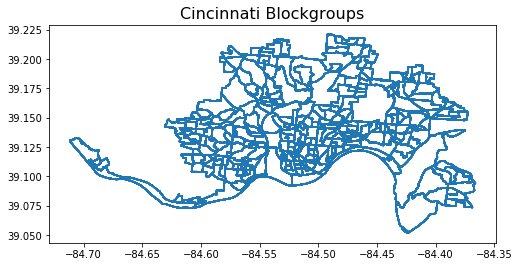

In [4]:
cin.boundary.plot(figsize=(8,8))
plt.title('Cincinnati Blockgroups', size=16)
plt.savefig('cincy_bg')

In [5]:
len(cin.GIDBG.unique())

284

In [6]:
cin.dropna(inplace=True)

In [7]:
X, y = cin, cin.ems_calls
X.drop(['GIDBG', 'geometry', 'year_month', 'ems_calls'], axis=1, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

res = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              ems_calls   No. Observations:                 7174
Model:                            GLM   Df Residuals:                     7160
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6979.4
Date:                Wed, 18 Mar 2020   Deviance:                       8952.5
Time:                        07:09:15   Pearson chi2:                 1.27e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pct_Males_ACS_13_17               1.1753      0.239      4.919      0.000       0.707       1

In [10]:
poisson_predictions = res.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
predictions_summary_frame.head()

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test

In [11]:
actual_counts.index = range(0, len(actual_counts))

In [12]:
predicted_counts.index = range(0, len(predicted_counts))

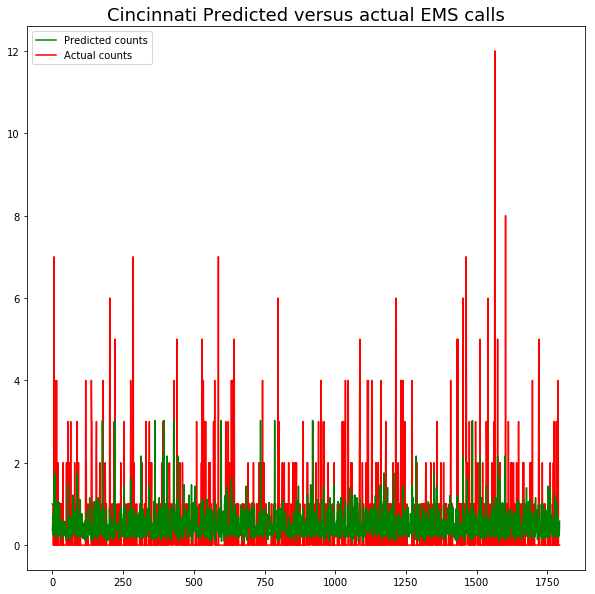

<Figure size 432x288 with 0 Axes>

In [13]:
fig = plt.figure(figsize=(10,10))
plt.title('Cincinnati Predicted versus actual EMS calls', size=18)
actual, = plt.plot(actual_counts, 'r-', label='Actual counts')
predicted, = plt.plot(predicted_counts, 'g-', label='Predicted counts')
plt.legend(handles=[predicted, actual])
plt.show()
plt.savefig('Cincinatti_EMS_poisson_031120')

### Tempe 

In [14]:
bg_pkl = open('tempems_bg_pkl_030820', 'rb')

tempe = pickle.load(bg_pkl)
#tempe.dropna(inplace=True)

bg_pkl = open('cinems_bg_pkl_030820', 'rb')

cin = pickle.load(bg_pkl)
#cin.dropna(inplace=True)

In [15]:
len(tempe.year_month.unique())

33

In [17]:
tempe.year_month.unique()

array([2017.01, 2017.02, 2017.03, 2017.04, 2017.05, 2017.06, 2017.07,
       2017.08, 2017.09, 2017.1 , 2017.11, 2017.12, 2018.01, 2018.02,
       2018.03, 2018.04, 2018.05, 2018.06, 2018.07, 2018.08, 2018.09,
       2018.1 , 2018.11, 2018.12, 2019.01, 2019.02, 2019.03, 2019.04,
       2019.05, 2019.06, 2019.07, 2019.08, 2019.09])

In [18]:
len(tempe.GIDBG.unique())

109

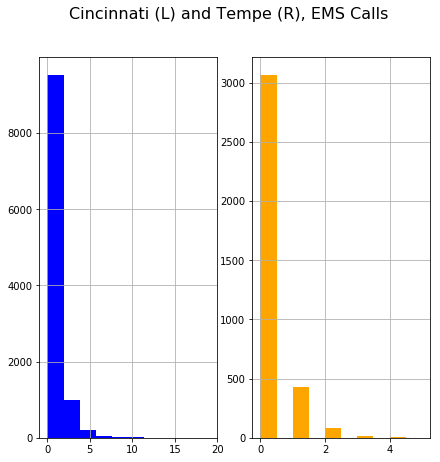

In [19]:
fig, ax = plt.subplots(1,2)
cin.ems_calls.hist(ax=ax[0], color='blue', figsize=(7,7))
tempe.ems_calls.hist( ax=ax[1], color='orange', figsize=(7,7))
plt.suptitle('Cincinnati (L) and Tempe (R), EMS Calls', size=16)
plt.savefig('ems_hist')

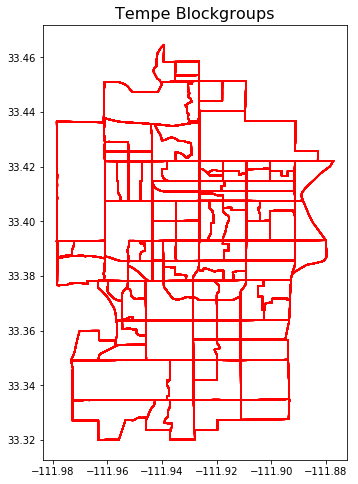

In [20]:
tempe.boundary.plot(figsize=(8,8), color='red')
plt.title('Tempe Blockgroups', size=16)
plt.savefig('tempe_bg')

In [21]:
tempe.dropna(inplace=True)
X, y = tempe, tempe.ems_calls
X.drop(['GIDBG', 'geometry', 'year_month', 'ems_calls'], axis=1, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
res = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              ems_calls   No. Observations:                 2508
Model:                            GLM   Df Residuals:                     2494
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1245.6
Date:                Wed, 18 Mar 2020   Deviance:                       1702.6
Time:                        07:09:32   Pearson chi2:                 3.05e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pct_Males_ACS_13_17               2.0612      0.646      3.190      0.001       0.795       3

In [24]:
poisson_predictions = res.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
predictions_summary_frame.head()

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test

In [25]:
actual_counts.index = range(0, len(actual_counts))

In [26]:
predicted_counts.index = range(0, len(predicted_counts))

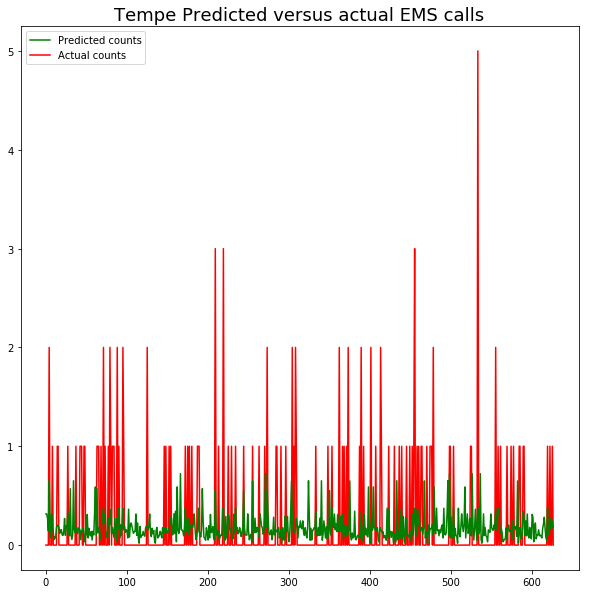

<Figure size 432x288 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(10,10))
plt.title('Tempe Predicted versus actual EMS calls', size=18)
actual, = plt.plot(actual_counts, 'r-', label='Actual counts')
predicted, = plt.plot(predicted_counts, 'g-', label='Predicted counts')
plt.legend(handles=[predicted, actual])
plt.show()
plt.savefig('Tempe_EMS_poisson_031120')

In [28]:
cin.columns

Index(['GIDBG', 'pct_Males_ACS_13_17', 'pct_Pop_18_24_ACS_13_17',
       'pct_Pop_25_44_ACS_13_17', 'pct_Pop_45_64_ACS_13_17',
       'pct_Pop_65plus_ACS_13_17', 'pct_Hispanic_ACS_13_17',
       'pct_NH_White_alone_CEN_2010', 'pct_NH_Blk_alone_ACS_13_17',
       'pct_NH_Asian_alone_ACS_13_17', 'Med_HHD_Inc_BG_ACS_13_17',
       'pct_Prs_Blw_Pov_Lev_ACS_13_17', 'Med_House_Value_BG_ACS_13_17',
       'pct_College_ACS_13_17', 'geometry', 'year_month', 'ems_calls',
       'log_pop'],
      dtype='object')

In [55]:
cin.groupby('GIDBG').sum().ems_calls.describe()

count    284.000000
mean      20.848592
std       28.418658
min        0.000000
25%        4.750000
50%       12.000000
75%       25.000000
max      187.000000
Name: ems_calls, dtype: float64